In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import sys, os

path2add = os.path.normpath(os.path.abspath('..'))
if path2add not in sys.path:
    sys.path.append(path2add)

import torch
from torch_geometric.data import Data
from dataloader import AugmentGraphTextDataset
from augment import RWSample, UniformSample, NodeAttrMask, EdgePerturbation
import networkx as nx
import numpy as np
from transformers import AutoTokenizer

from functools import partial

from matplotlib import pyplot as plt

In [25]:
def display(edges):
    G = nx.DiGraph()
    for i in range(len(edges[0])):
        G.add_edge(int(edges[0][i]), int(edges[1][i]))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=False, font_size=8, node_color='skyblue', node_size=200, edge_color='gray', linewidths=0.3, arrows=False)

In [26]:
model_name = 'nlpie/distil-biobert'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [27]:
def transform_augment(sample, augment):
    tmp = sample.clone()
    if tmp.x.shape[0] > 6:
        tmp = augment(tmp)

    data = Data(
        x=sample.x,
        edge_index=sample.edge_index,
        x_augment=tmp.x,
        edge_index_augment=tmp.edge_index,
        input_ids=sample.input_ids,
        attention_mask=sample.attention_mask,
        description=sample.description,
    )
    return data

In [60]:
gt = np.load("../data/token_embedding_dict.npy", allow_pickle=True)[()]
train_dataset = AugmentGraphTextDataset(
    root="../data/",
    gt=gt,
    split="train",
    tokenizer=tokenizer,
    model_name=model_name,
    transform=partial(transform_augment, augment=NodeAttrMask(mode='partial')),
)

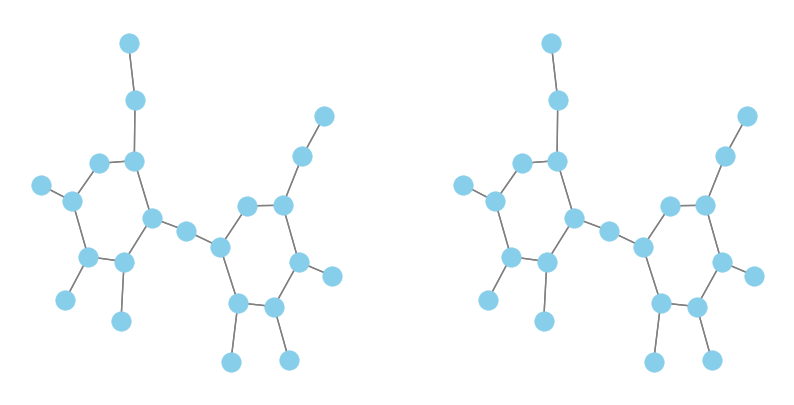

In [61]:
sample = train_dataset[9875]

plt.figure(figsize=(10, 5))
plt.subplot(121)
display(sample.edge_index)
plt.subplot(122)
display(sample.edge_index_augment)
plt.savefig("augment_drop_node.png", dpi=300, transparent=True)

In [62]:
list(sample.x), list(sample.x_augment)

([tensor([ 9.9071e-03,  9.6214e-02,  5.7846e-02,  2.7340e-01, -3.0586e-02,
           3.6905e-01,  9.0718e-02,  4.6959e-01,  2.3344e-01,  4.3428e-01,
           3.5429e-02,  1.0500e-02,  4.0067e-01,  2.5114e-01, -2.7618e-01,
           2.3078e-01,  5.1529e-01,  6.4970e-02,  5.3601e-01,  6.0626e-02,
          -1.2717e-01,  4.6215e-01, -3.3702e-02,  2.3247e-01,  3.7872e-02,
          -1.1067e-01,  2.0282e-03, -3.8749e-01, -1.9044e-01,  1.0786e-01,
           1.9794e-01,  1.0330e-01,  9.6554e-02,  8.9131e-02, -6.6925e-02,
           1.9195e-01,  2.5035e-01,  2.1765e-01,  3.7391e-02, -1.3818e-01,
           7.8069e-02, -3.3157e-02,  4.1467e-01,  3.7851e-02, -2.6755e-01,
          -2.8276e-01,  5.3998e-03, -8.7742e-02, -1.0807e-02, -1.4401e-01,
           2.9688e-01,  1.1261e-01,  5.5644e-02,  2.6083e-01, -8.0224e-03,
          -1.1332e-01, -1.4928e-01,  2.0085e-01,  2.2493e-01,  4.6220e-01,
           5.2962e-02,  1.8020e-01, -9.5856e-02,  1.3715e-01,  1.0336e-01,
          -2.4976e-03, -1